In [1]:
import cv2
import matplotlib.pyplot as plt
import torch
from torch import Tensor
import torchvision
import numpy as np
from torchvision import transforms
from PIL import Image

In [2]:
list_path = ['Proj1.1sub/Chessboard_00451_1.png', 'Proj1.1sub/Chessboard_00451_2.png', 'Proj1.1sub/Chessboard_00451.png', 'Proj1.1sub/Chessboard_0481_0.png', 'Proj1.1sub/Chessboard_0481_1.png']
num_images = len(list_path)
num_columns = (num_images + 1) // 2  # Ceiling division for columns
image = Image.open(list_path[4])
w,h =image.size
print(f'Width: {w}, Height: {h}')
print(type(image))

image = Image.open(list_path[0])
w,h =image.size
print(f'Width: {w}, Height: {h}')
print(type(image))
num_rows = 1
num_columns = 5

Width: 644, Height: 383
<class 'PIL.PngImagePlugin.PngImageFile'>
Width: 713, Height: 440
<class 'PIL.PngImagePlugin.PngImageFile'>


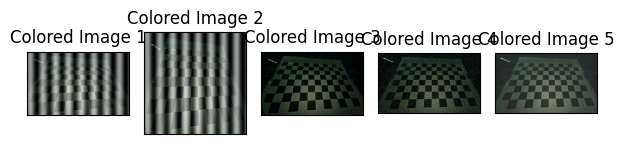

In [3]:
new_width, new_height = 461,461

plt.figure(figsize=(6,6))
for i in range(num_images):
    image = cv2.imread(list_path[i])
    # resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(image, cmap='gray',)
    plt.title(f'Colored Image {i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


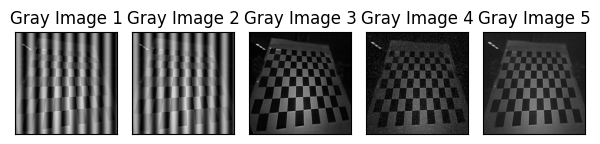

In [4]:
gray_img_list = []
for i in range(len(list_path)):
    image = cv2.imread(list_path[i])
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    image_gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    gray_img_list.append(image_gray)

plt.figure(figsize=(6,6))
for i in range(num_images):
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(gray_img_list[i], cmap='gray',)
    plt.title(f'Gray Image {i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

In [5]:
rows, cols = gray_img_list[0].shape
print(rows, cols)

461 461


Min:0 Max:255
Min:0 Max:255
Min:0 Max:255
Min:0 Max:255
Min:0 Max:255


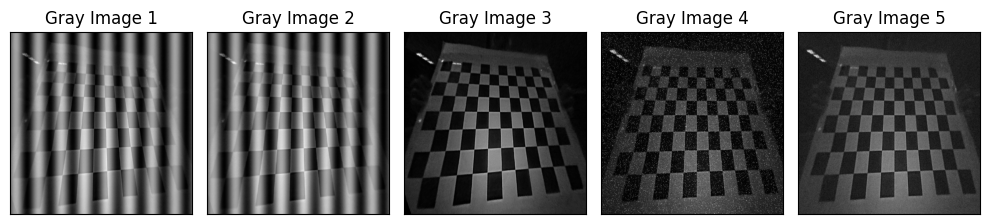

In [6]:
import copy

def stretching_histogram(image):
    x_min = image.min()
    x_max = image.max()
    normalized_image = ((image - x_min) / (x_max - x_min) * 255).astype(np.uint8)
    return normalized_image
gray_img_list = [stretching_histogram(img) for img in gray_img_list]

gray_img_list_copy = [copy.deepcopy(i) for i in gray_img_list]
for i in gray_img_list_copy:
    print(f"Min:{i.min()}", f"Max:{i.max()}")
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(gray_img_list[i], cmap='gray',)
    plt.title(f'Gray Image {i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

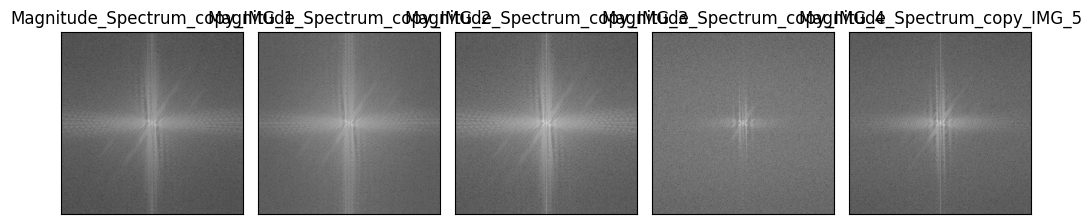

In [7]:
plt.figure(figsize=(10, 10))
dft_shift_list_copy = []
dft_shift_list = []
magnitude_spectrum_list_copy = []
magnitude_spectrum_list = []

for i in range(num_images):
    dft_copy = cv2.dft(np.float64(gray_img_list_copy[i]), flags=cv2.DFT_COMPLEX_OUTPUT)                     # biến đổi Fourier để chuyển đổi ảnh sang miền tần số
    dft_shift = np.fft.fftshift(dft_copy)                                                                   # dịch chuyển tần số gốc về trung tâm để dễ dàng xử lý
    dft_shift_list_copy.append(dft_shift)                                               
    dft_shift_list.append(dft_shift)
    
    '''quan sát magnitude spectrum các ảnh copy'''
    magnitude_spectrum = np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))                      # độ lớn phổ, phần thực + phần ảo
    magnitude_spectrum_list_copy.append(magnitude_spectrum)
    magnitude_spectrum_list.append(magnitude_spectrum)
    
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(f'Magnitude_Spectrum_copy_IMG_{i + 1}')
    plt.xticks([]), plt.yticks([])
    cv2.imwrite(filename=f'{i+1}.png',img=cv2.normalize(
    magnitude_spectrum, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX
))
plt.tight_layout()
plt.show()


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


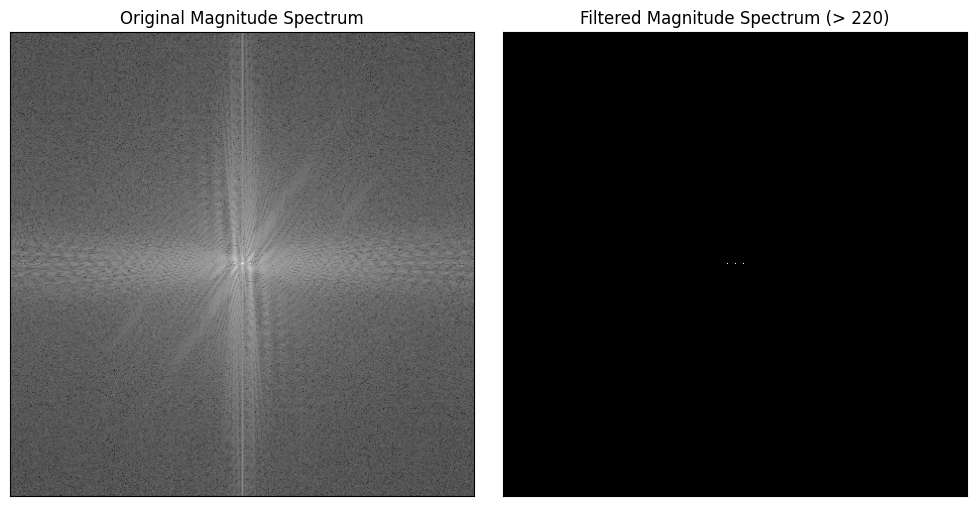

In [8]:
dft = cv2.dft(np.float64(gray_img_list_copy[0]), flags=cv2.DFT_COMPLEX_OUTPUT)                                    # biến đổi Fourier để chuyển đổi ảnh sang miền tần số   
dft_shift = np.fft.fftshift(dft)                                                                                  # dịch chuyển tần số gốc về trung tâm để dễ dàng xử lý
threshold = 220 
magnitude_spectrum = np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))                                # độ lớn phổ, phần thực + phần ảo
magnitude_spectrum_nor = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX)                         # chuyển về 0->255 để đặt ngưỡng cho dễ


mask = magnitude_spectrum_nor > threshold
print(mask)

# Tạo một hình ảnh mới để hiển thị các điểm được giữ lại
filtered_magnitude_spectrum_nor = np.zeros_like(magnitude_spectrum_nor)
filtered_magnitude_spectrum_nor[mask] = magnitude_spectrum_nor[mask]

filtered_magnitude_spectrum = np.log(filtered_magnitude_spectrum_nor + 1)                                         # quay về log cho đồng bộ, + 1 đề phòng trường hợp log 0

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Original Magnitude Spectrum')
plt.xticks([]), plt.yticks([])


plt.subplot(1, 2, 2)
plt.imshow(filtered_magnitude_spectrum, cmap='gray')

plt.title('Filtered Magnitude Spectrum (> 220)')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


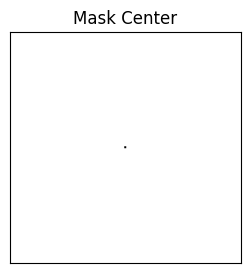

In [9]:
''' việc bỏ điêm sáng ở giữa đi để khi tiến hành lấy ngưỡng các điểm sáng, sau đó lấy ảnh gốc trừ các điểm sáng còn lại sẽ ít bị ảnh hưởng bởi điểm trung tâm'''
mask_center = np.ones((rows, cols, 2), np.uint8)
mask_center[int(rows*0.495):int(rows*0.505),int(cols*0.495):int(cols*0.505)] = 0
mask_center_new = mask_center[:, :, 0]
plt.figure(figsize=(3,3))
plt.imshow(mask_center_new, cmap='gray')

plt.title('Mask Center')
plt.xticks([]), plt.yticks([])
plt.show()



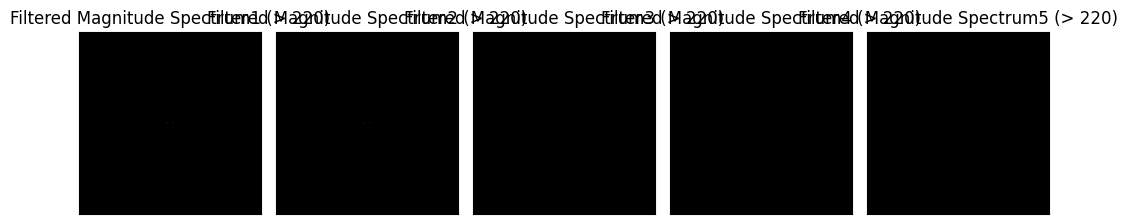

Shape of magnitude_spectrum[i]: (461, 461)
Shape of filtered_magnitude_spectrum_remove_center[i]: (461, 461)


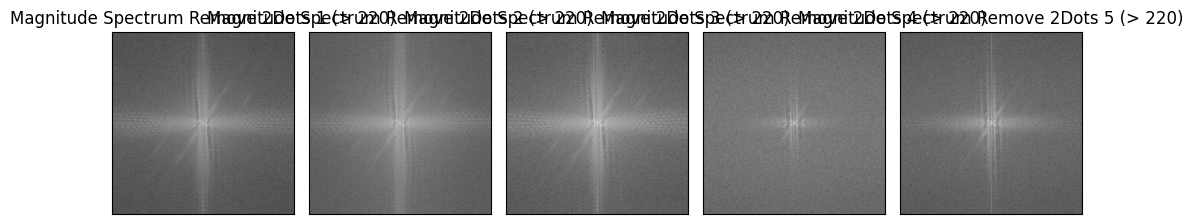

In [10]:
threshold = 220
plt.figure(figsize=(10,10))
filtered_magnitude_spectrum_copy_list = []
filtered_magnitude_spectrum_remove_center_copy_list = []
final_magnitude_spectrum = []

for i in range (num_images):
    dft_shift = dft_shift_list_copy[i]                                                                                    
    magnitude_spectrum = magnitude_spectrum_list_copy[i]   
    
    # chuyển về 0->255 để đặt ngưỡng cho dễ     
    magnitude_spectrum_nor = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX)                               
    mask = magnitude_spectrum_nor > threshold
    # print(mask)
    # Tạo một hình ảnh mới để hiển thị các điểm được giữ lại
    filtered_magnitude_spectrum_nor = np.zeros_like(magnitude_spectrum_nor)
    filtered_magnitude_spectrum_nor[mask] = magnitude_spectrum_nor[mask]

    # quay về log cho đồng bộ, + 1 đề phòng trường hợp log 0
    filtered_magnitude_spectrum = np.log(filtered_magnitude_spectrum_nor + 1)                                         
    filtered_magnitude_spectrum_copy_list.append(filtered_magnitude_spectrum)
    
# print("filtered_magnitude_spectrum shape:", filtered_magnitude_spectrum.shape)
# print("mask_center_new shape:", mask_center_new.shape)
'''che điểm sáng center'''
for i in range(num_images):
    filtered_magnitude_spectrum = filtered_magnitude_spectrum_copy_list[i]
    filtered_magnitude_spectrum = filtered_magnitude_spectrum * mask_center_new
    filtered_magnitude_spectrum_remove_center_copy_list.append(filtered_magnitude_spectrum)
    
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(filtered_magnitude_spectrum, cmap='gray')
    plt.title(f'Filtered Magnitude Spectrum{i+1} (> 220)')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,10))
# lấy ảnh magnitude spectrum ban đầu trừ đi ảnh này:
print("Shape of magnitude_spectrum[i]:", magnitude_spectrum_list[1].shape)
print("Shape of filtered_magnitude_spectrum_remove_center[i]:", filtered_magnitude_spectrum_remove_center_copy_list[1].shape)
for i in range(num_images):
    sub = cv2.subtract(magnitude_spectrum_list[i], filtered_magnitude_spectrum_remove_center_copy_list[i])
    final_magnitude_spectrum.append(sub)
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(sub, cmap='gray')
    plt.title(f'Magnitude Spectrum Remove 2Dots {i+1} (> 220)')
    plt.xticks([]), plt.yticks([])
    
plt.tight_layout()
plt.show()
    
    
    

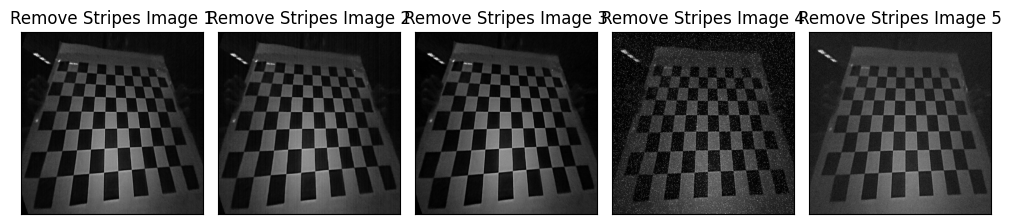

In [11]:
remove_stripes = []
filtered_mask = np.zeros_like(filtered_magnitude_spectrum_remove_center_copy_list[0])
plt.figure(figsize=(10, 10))
for i in range(num_images):
    filtered_magnitude_spectrum = filtered_magnitude_spectrum_remove_center_copy_list[i]
    
    # Chuẩn hóa filtered_magnitude_spectrum về dải [0, 1]
    normalized_spectrum = cv2.normalize(filtered_magnitude_spectrum, None, 0, 1, cv2.NORM_MINMAX)
    
    '''Tạo mask nhị phân từ filtered_magnitude_spectrum (giá trị > threshold -> giữ lại)'''
    threshold_value = 0.5  # Bạn có thể điều chỉnh giá trị này
    filtered_mask = (normalized_spectrum > threshold_value).astype(np.float32)
    inverted_mask = 1 - filtered_mask[..., np.newaxis]
    # flitered_mask = 1 - filtered_mask
    
    # plt.figure(figsize=(5, 5))
    # plt.imshow(inverted_mask, cmap='gray')
    # plt.title(f"Mask for Image {i+1}")
    # plt.xticks([]), plt.yticks([])
    # plt.show()
    
    ''' Áp dụng mask lên dft_shift '''
    filtered_dft_shift = dft_shift_list[i] * inverted_mask  # Nhân với mask (có cùng shape)
    
    
    '''Dịch ngược về góc và thực hiện IDFT'''
    f_ishift = np.fft.ifftshift(filtered_dft_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    
    cv2.normalize(img_back, img_back, 0, 255, cv2.NORM_MINMAX)
    img_back = np.uint8(img_back)
    remove_stripes.append(img_back)
    
    # Hiển thị ảnh tái tạo
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(img_back, cmap='gray')
    cv2.imwrite(filename=f'{i+1}.png',img=cv2.normalize(
    img_back, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX
))
    plt.title(f"Remove Stripes Image {i+1}")
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

    

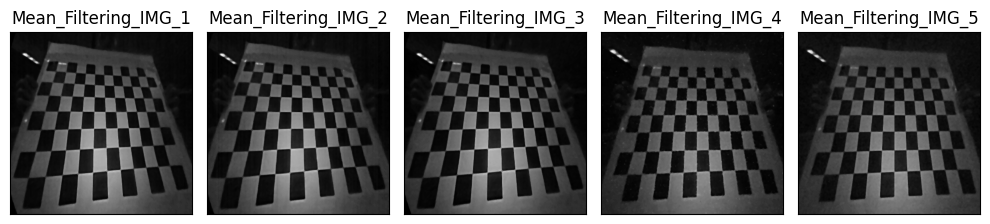

In [12]:
plt.figure(figsize=(10,10))
spp_removal_image = []
for i in range (num_images):
    # Apply mean filtering
    mean_image = cv2.medianBlur(remove_stripes[i],5)
    spp_removal_image.append(mean_image)
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(f'Mean_Filtering_IMG_{i + 1}')
    plt.xticks([]), plt.yticks([])
    cv2.imwrite(filename=f'{i+1}.png',img=cv2.normalize(
    mean_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX
))
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

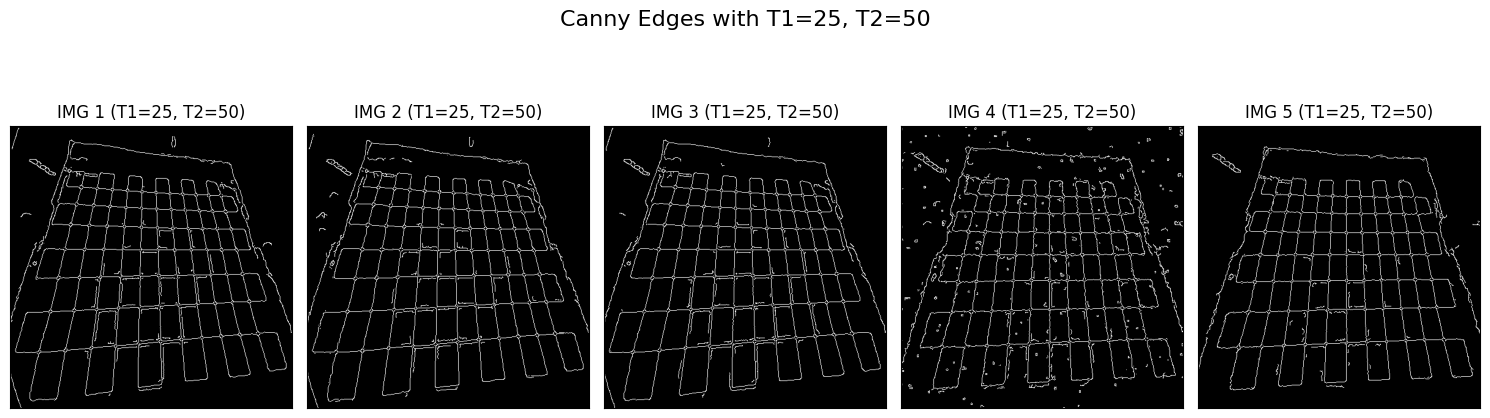

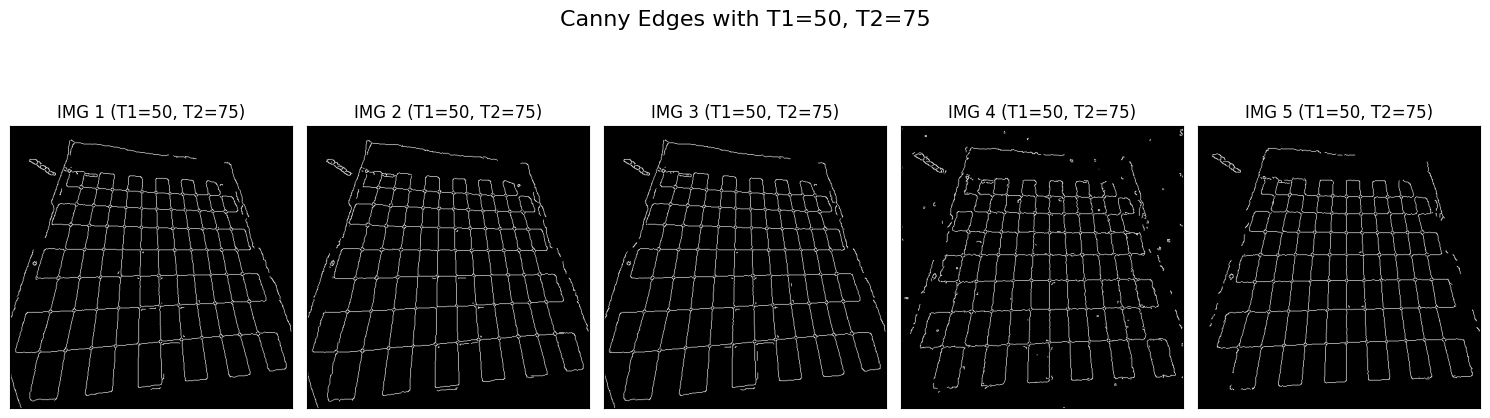

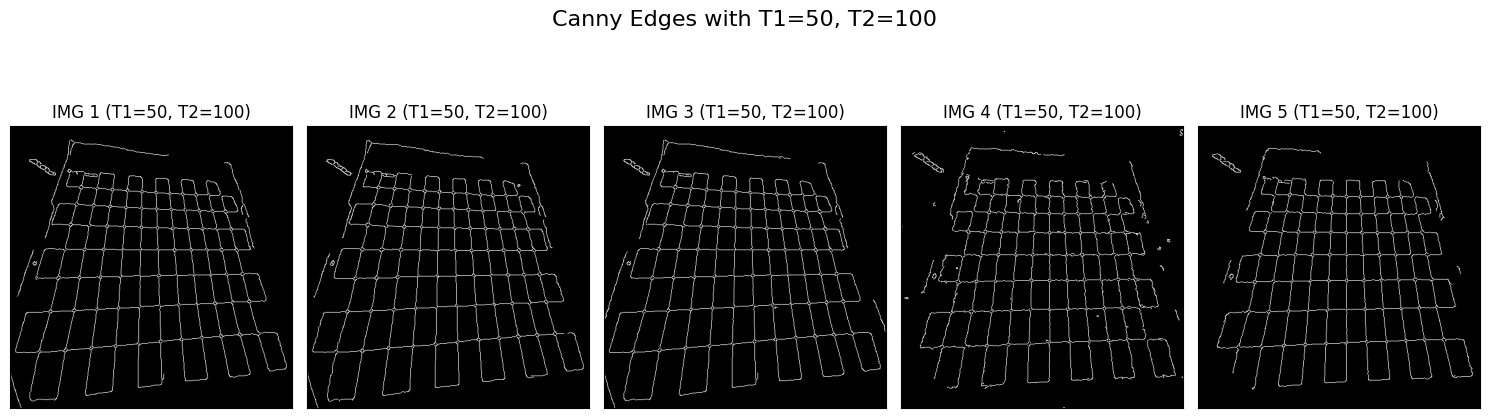

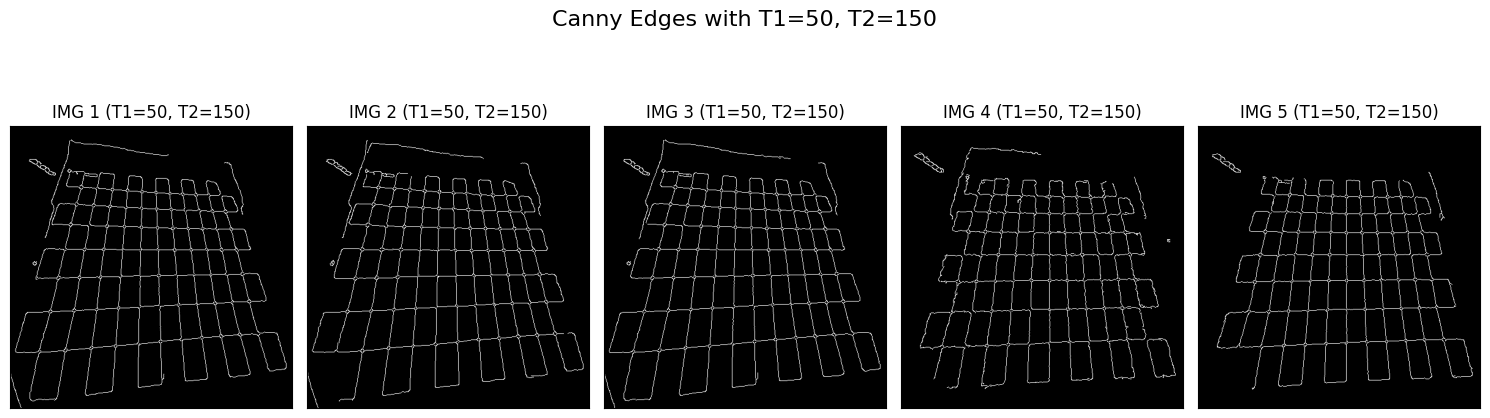

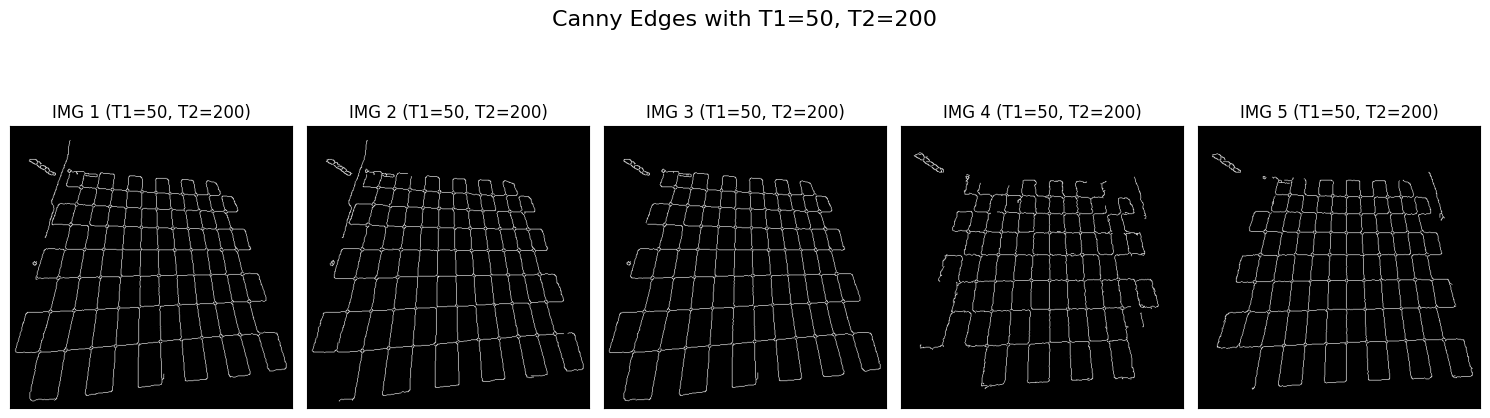

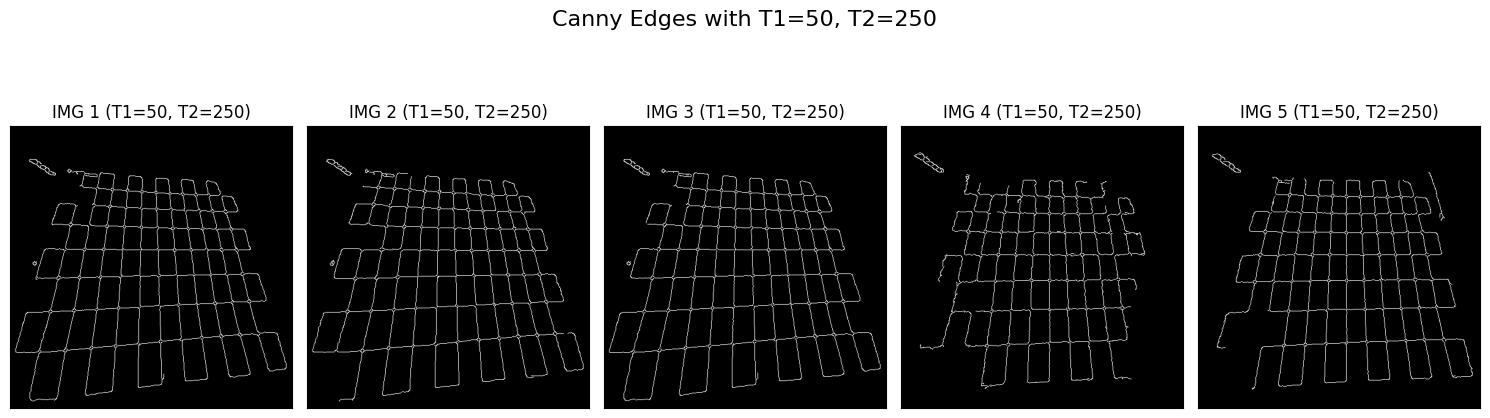

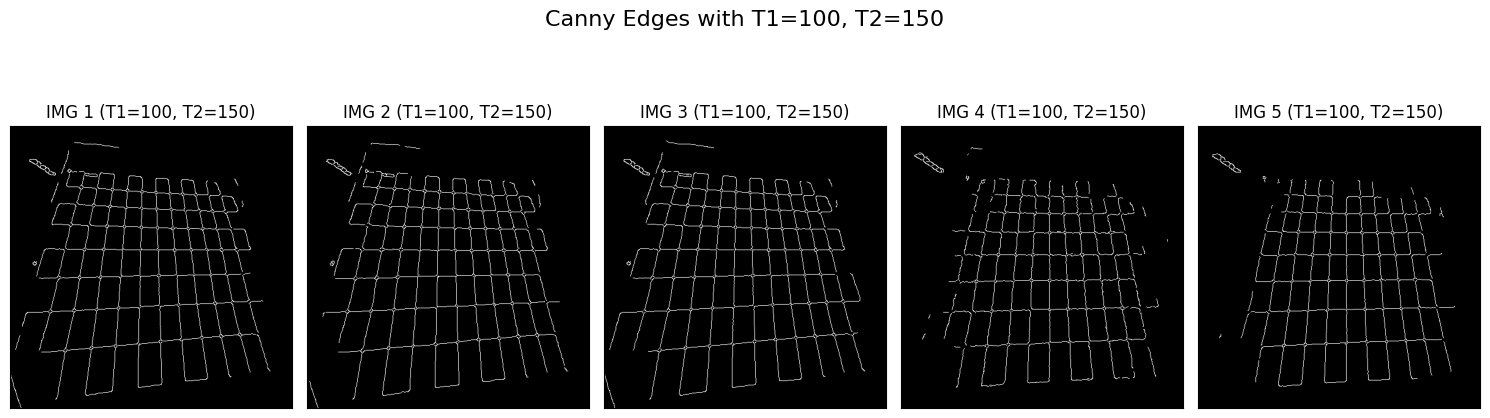

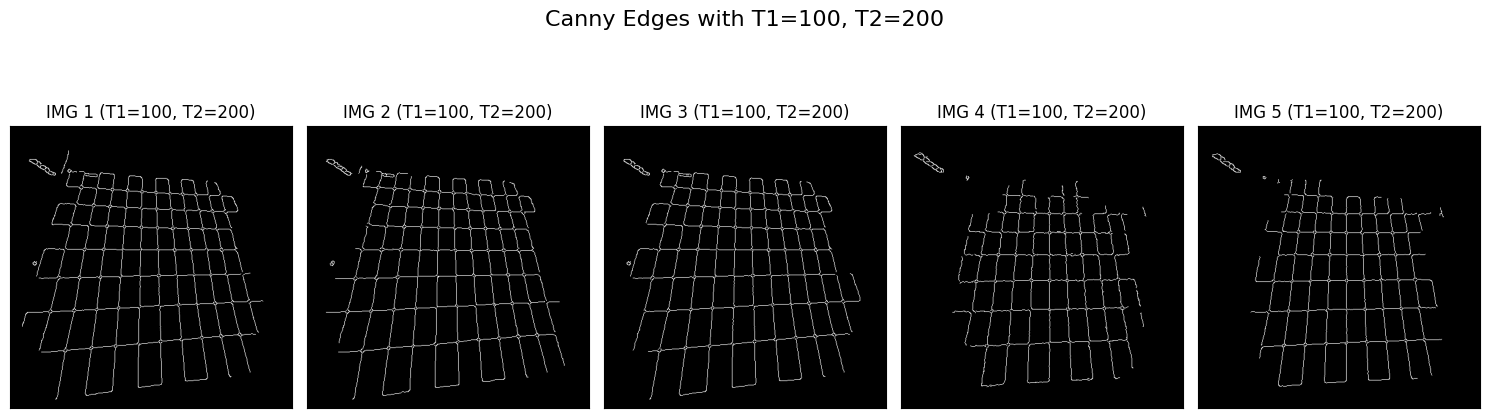

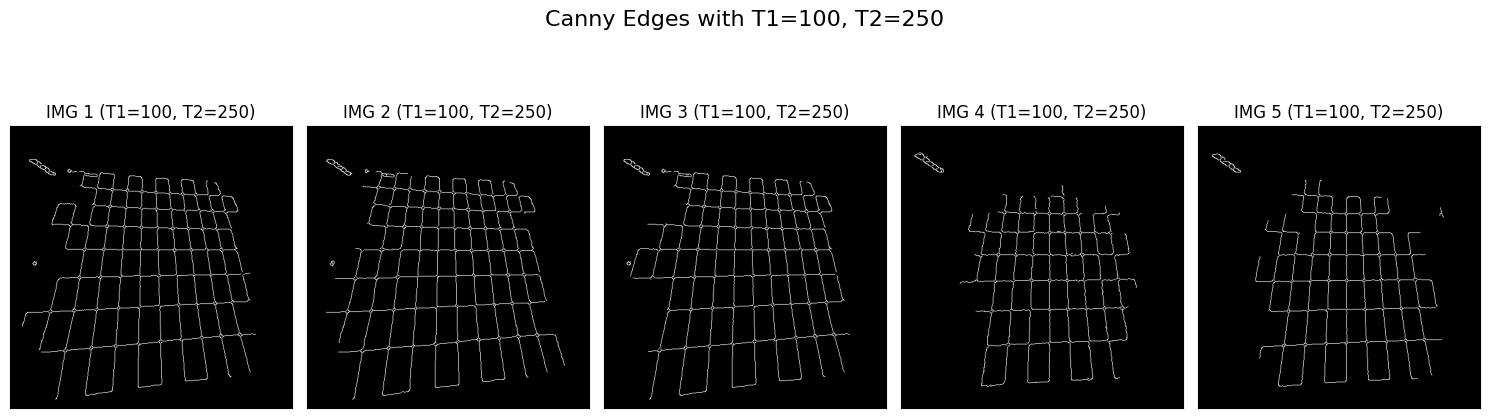

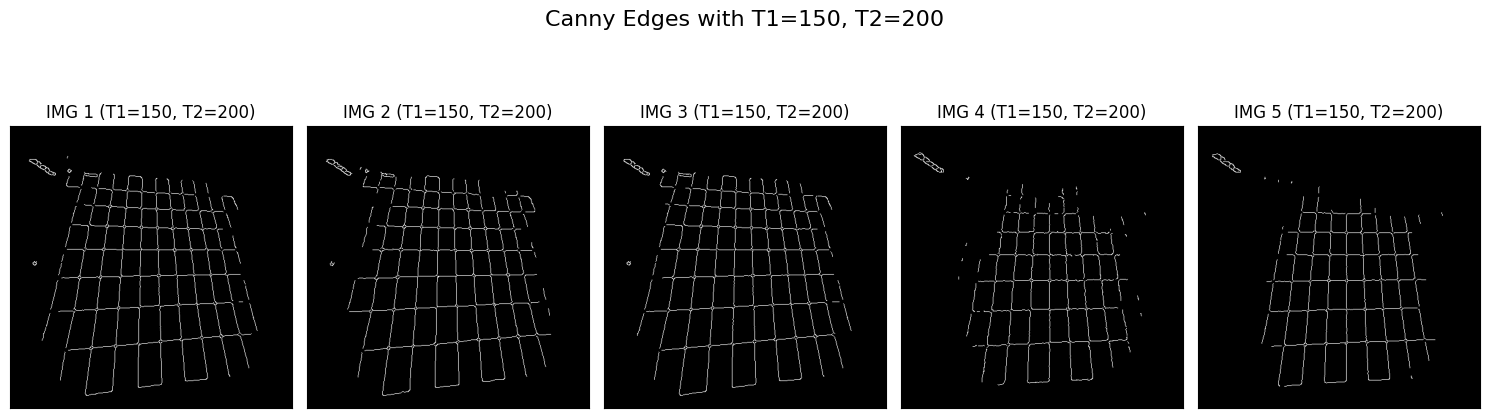

In [13]:
edges_images = []
plt.figure(figsize=(15, 15))

threshold_pairs = [(25,50),(50,75),(50, 100), (50, 150), (50, 200), (50, 250), (100, 150),
                   (100, 200), (100, 250), (150, 200)]

for j, (thresh1, thresh2) in enumerate(threshold_pairs):
    plt.figure(figsize=(15, 5)) 
    for i in range(num_images):
        edges = cv2.Canny(spp_removal_image[i], threshold1=thresh1, threshold2=thresh2)
        edges_images.append(edges)

        plt.subplot(1, num_images, i + 1) 
        plt.imshow(edges, cmap='gray')
        plt.title(f'IMG {i + 1} (T1={thresh1}, T2={thresh2})')
        plt.xticks([]), plt.yticks([])

    plt.suptitle(f'Canny Edges with T1={thresh1}, T2={thresh2}', fontsize=16)
    plt.tight_layout()
    plt.show()


In [14]:
# '''Thử các cặp giá trị blocksize, C khác nhau, từ đó chọn ra giá trị tốt nhất'''
# block_sizes = [57,61,81,91,101]  # Các giá trị lẻ để thử,
# C_values = [0,5,10,15]      # Các giá trị của C để thử

# # Số lượng ảnh
# num_images = len(spp_removal_image)

# # Duyệt qua các giá trị block size và C
# for block_size in block_sizes:
#     for C in C_values:
#         plt.figure(figsize=(10,10))
#         # Tạo figure mới cho từng cặp block size và C
#         fig, axes = plt.subplots(1, 5, figsize=(20, 5))
#         fig.suptitle(f'Block Size: {block_size}, C: {C}', fontsize=16)

#         # Duyệt qua từng ảnh và áp dụng adaptive threshold
#         for i in range(5):  
            
#             img = spp_removal_image[i]
#             img = cv2.GaussianBlur(img, (7, 7), 0) 
#             # Áp dụng adaptive threshold
#             th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                                          cv2.THRESH_BINARY, blockSize=block_size, C=C)

#             # Hiển thị kết quả
#             axes[i].imshow(th3, cmap='gray')
#             axes[i].set_title(f'Image {i + 1}')
#             axes[i].axis('off')

#         plt.tight_layout()
#         plt.subplots_adjust(top=0.85)
#         plt.show()

In [15]:
# # ret,thresh = cv2.threshold(gray,70,255,0)
# adpt_thresh_images = []
# plt.figure(figsize=(20,10))
# binary_images = []

# for i in range (num_images):
#     img = spp_removal_image[i]
#     # Apply threshold
#     img = cv2.GaussianBlur(img, (9, 9), 0) 
#     th3 = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,blockSize=151,C=10)
#     adpt_thresh_images.append(th3)
    
#     plt.subplot(num_rows, num_columns, i + 1)
#     plt.imshow(th3, cmap='gray')
#     plt.title(f'Adaptive{i + 1}')
#     plt.xticks([]), plt.yticks([])
#     cv2.imwrite(filename=f'{i+1}.png',img=cv2.normalize(
#     th3, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX
# ))
# plt.tight_layout()
# plt.show()

In [16]:
# erod_img = []
# plt.figure(figsize=(20,10))
# kernel = np.ones((7,7), np.uint8)
# for i in range(num_images):
#     eroded_image = cv2.erode(adpt_thresh_images[i], kernel, iterations=1)
#     # eroded_image = cv2.dilate(eroded_image,kernel=np.ones((3,3), np.uint8),iterations=4)
#     erod_img.append(eroded_image)
#     plt.subplot(num_rows, num_columns, i + 1)
#     plt.imshow(eroded_image, cmap='gray',)
#     plt.title(f'Closed Image {i + 1}')
#     plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.show()

In [17]:
# closed_image = []
# plt.figure(figsize=(20,10))
# kernel = np.ones((5,5), np.uint8)
# for i in range(num_images):
#     dilated_image = cv2.dilate(adpt_thresh_images[i], kernel, iterations=3)
#     eroded_image = cv2.erode(dilated_image,kernel, iterations=3)
#     # eroded_image = cv2.dilate(eroded_image,kernel=np.ones((3,3), np.uint8),iterations=4)
#     closed_image.append(eroded_image)
#     plt.subplot(num_rows, num_columns, i + 1)
#     plt.imshow(eroded_image, cmap='gray',)
#     plt.title(f'Closed Image {i + 1}')
#     plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.show()


In [18]:
# opened_images = []
# plt.figure(figsize=(20,10))
# kernel = np.ones((5, 5), np.uint8)
# for i in range(num_images):
    
#     eroded_image = cv2.erode(closed_image[i], kernel, iterations=3)
#     dilated_image = cv2.dilate(eroded_image, kernel, iterations=3)
#     opened_images.append(dilated_image)
#     plt.subplot(num_rows, num_columns, i + 1)
#     plt.imshow(dilated_image, cmap='gray',)
#     plt.title(f'Opening Image {i + 1}')
#     plt.xticks([]), plt.yticks([])
#     cv2.imwrite(filename=f'{i+1}.png',img=cv2.normalize(
#     dilated_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX
# ))
# plt.tight_layout()
# plt.show()

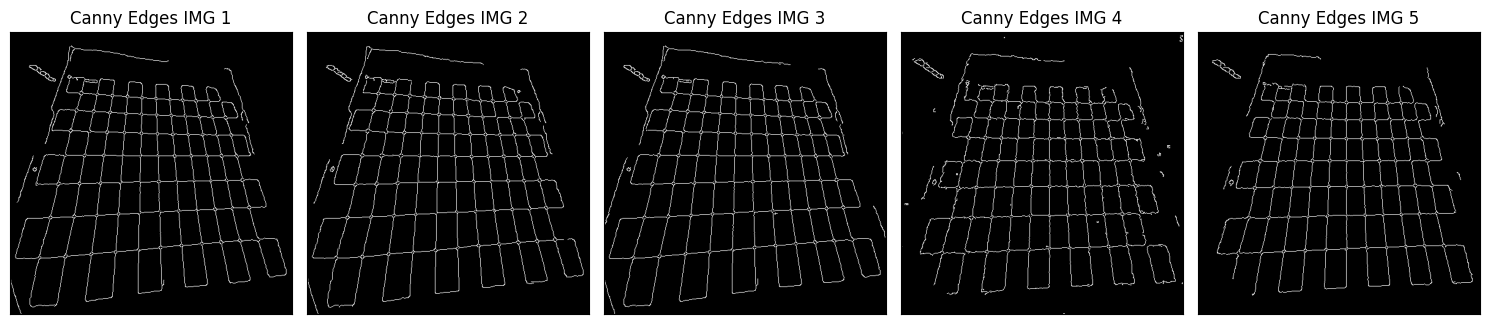

In [19]:

edges_images = []  

plt.figure(figsize=(15, 15))
for i in range(num_images):
    edges = cv2.Canny(spp_removal_image[i], threshold1=50, threshold2=100)
    edges_images.append(edges)

    plt.subplot(num_rows, num_columns, i+1) 
    plt.imshow(edges, cmap='gray')
    plt.title(f'Canny Edges IMG {i + 1}')
    plt.xticks([]), plt.yticks([])
    

    cv2.imwrite(f'edges_image_{i+1}.png', cv2.normalize(edges, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX))

plt.tight_layout()
plt.show()


In [20]:
print(num_rows, num_columns)
print(num_images)

1 5
5


In [21]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# dilated_images = []
# kernel_sizes = [(3,3),(5,5),(7, 7), (9,9),(11,11)]  # Các kích thước kernel thử nghiệm
# iterations_list = [1,2,3] 

# for kernel_size in kernel_sizes:
#     kernel = np.ones(kernel_size, np.uint8)  # Tạo kernel từ kích thước đã chọn
#     for iterations in iterations_list:
#         plt.figure(figsize=(15,15))
#         fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 5))
#         fig.suptitle(f'Kernel Size: {kernel_size}, Iter: {iterations}', fontsize=16)
#         for i in range(num_images):
            
#             edges = edges_images[i]  # Lấy ảnh edge đã có
#             dilated = cv2.dilate(edges, kernel, iterations=iterations)
#             dilated_images.append(dilated)

#             axes[i].imshow(dilated, cmap='gray')
#             axes[i].set_title(f'Image {i + 1}')
#             axes[i].axis('off')

#         plt.tight_layout()
#         plt.subplots_adjust(top=0.85)
#         plt.show()

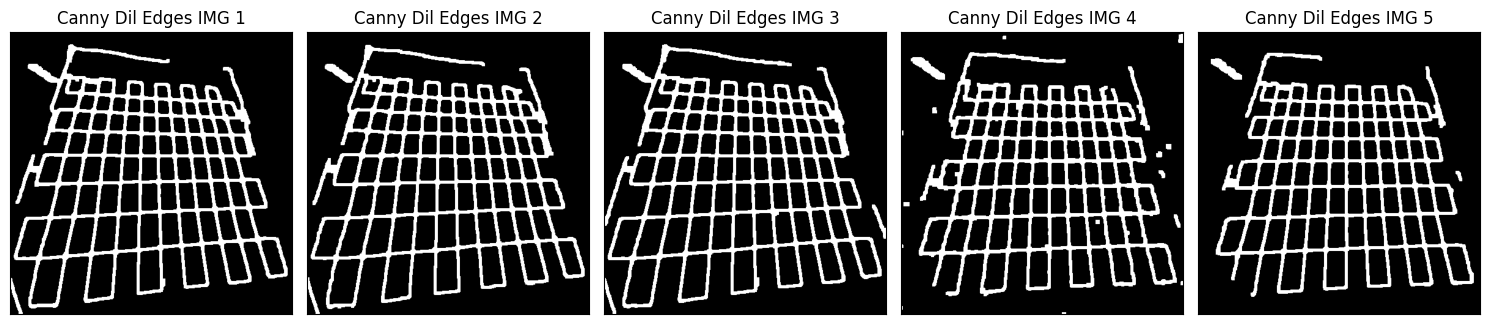

In [22]:
dil_image = []  
kernel = np.ones((5, 5), np.uint8)
plt.figure(figsize=(15, 15))
for i in range(num_images):
    dilated = cv2.dilate(edges_images[i], kernel, iterations=2)
    dilated = cv2.erode(dilated, np.ones((3,3), np.uint8), iterations=3)
    dil_image.append(dilated)
    plt.subplot(num_rows, num_columns, i+1) 
    plt.imshow(dilated, cmap='gray')
    plt.title(f'Canny Dil Edges IMG {i + 1}')
    plt.xticks([]), plt.yticks([])
    cv2.imwrite(f'edges_image_{i+1}.png', cv2.normalize(dilated, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX))

plt.tight_layout()
plt.show()


<Figure size 2000x1000 with 0 Axes>

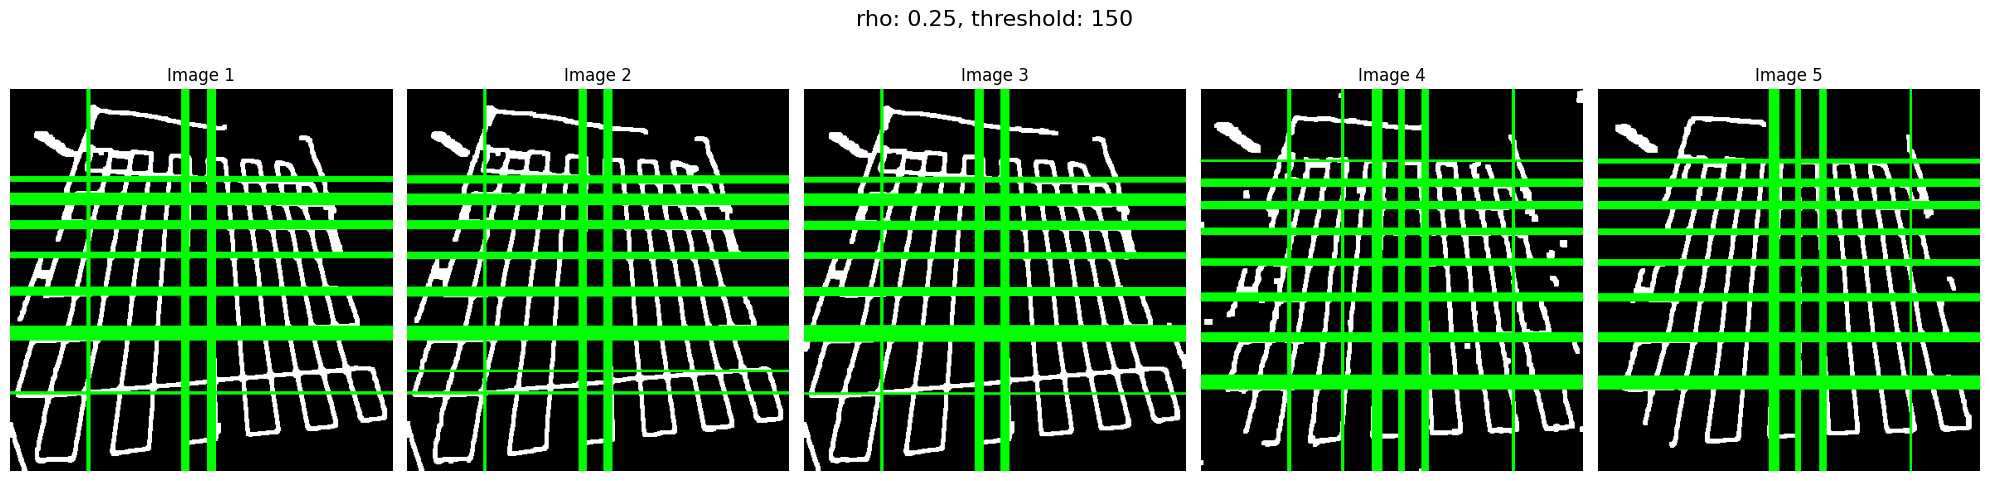

<Figure size 2000x1000 with 0 Axes>

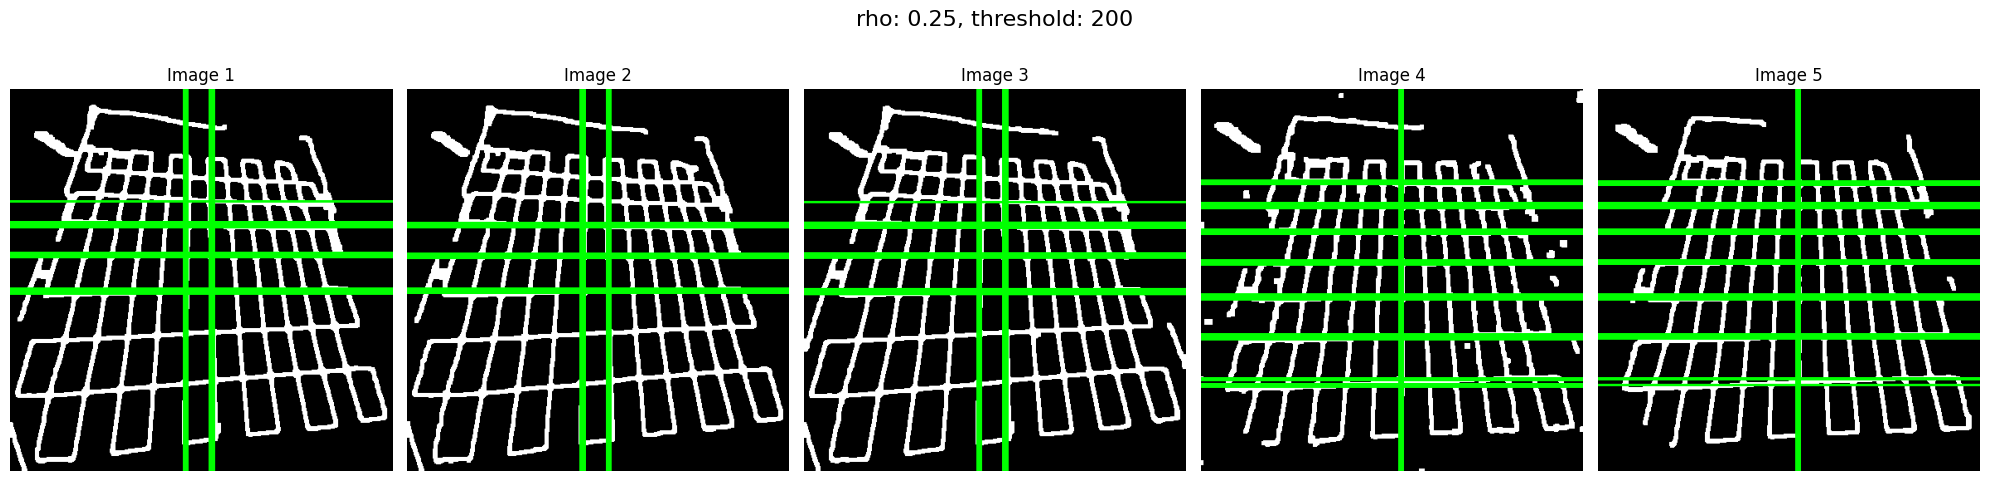

<Figure size 2000x1000 with 0 Axes>

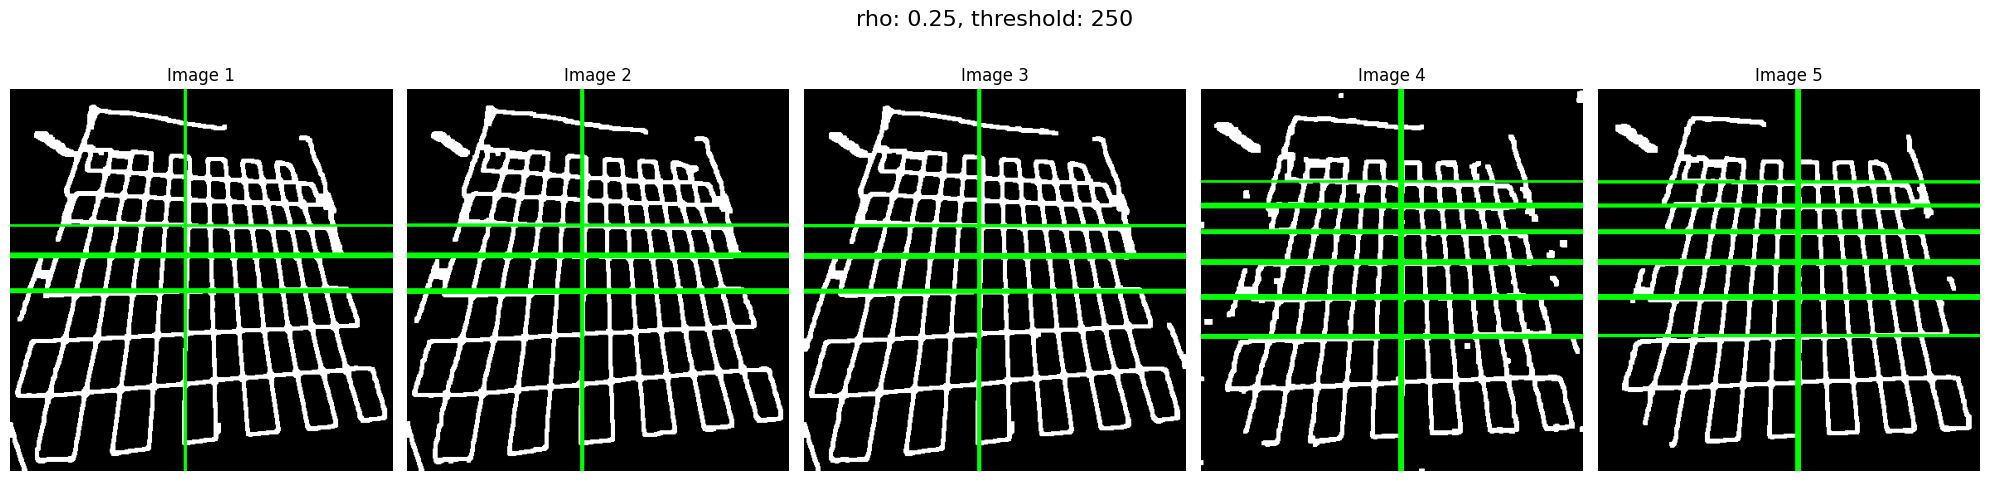

<Figure size 2000x1000 with 0 Axes>

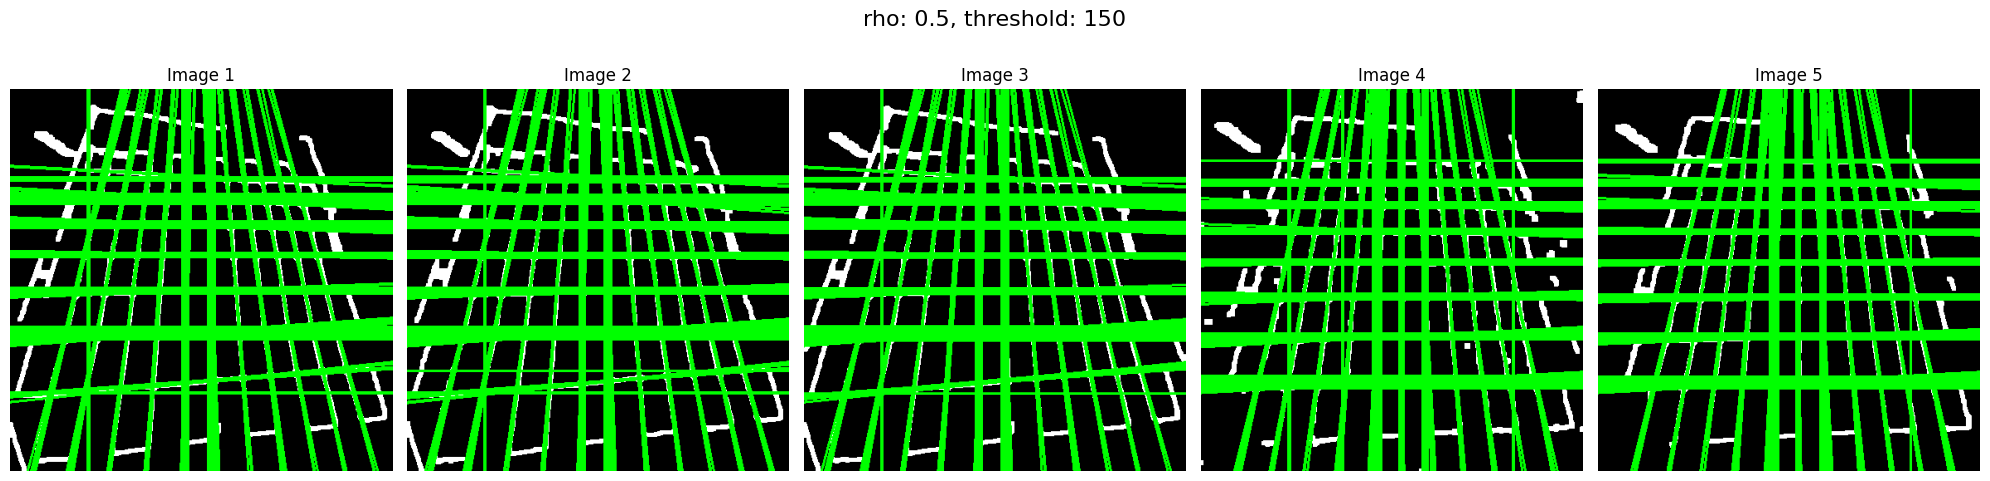

<Figure size 2000x1000 with 0 Axes>

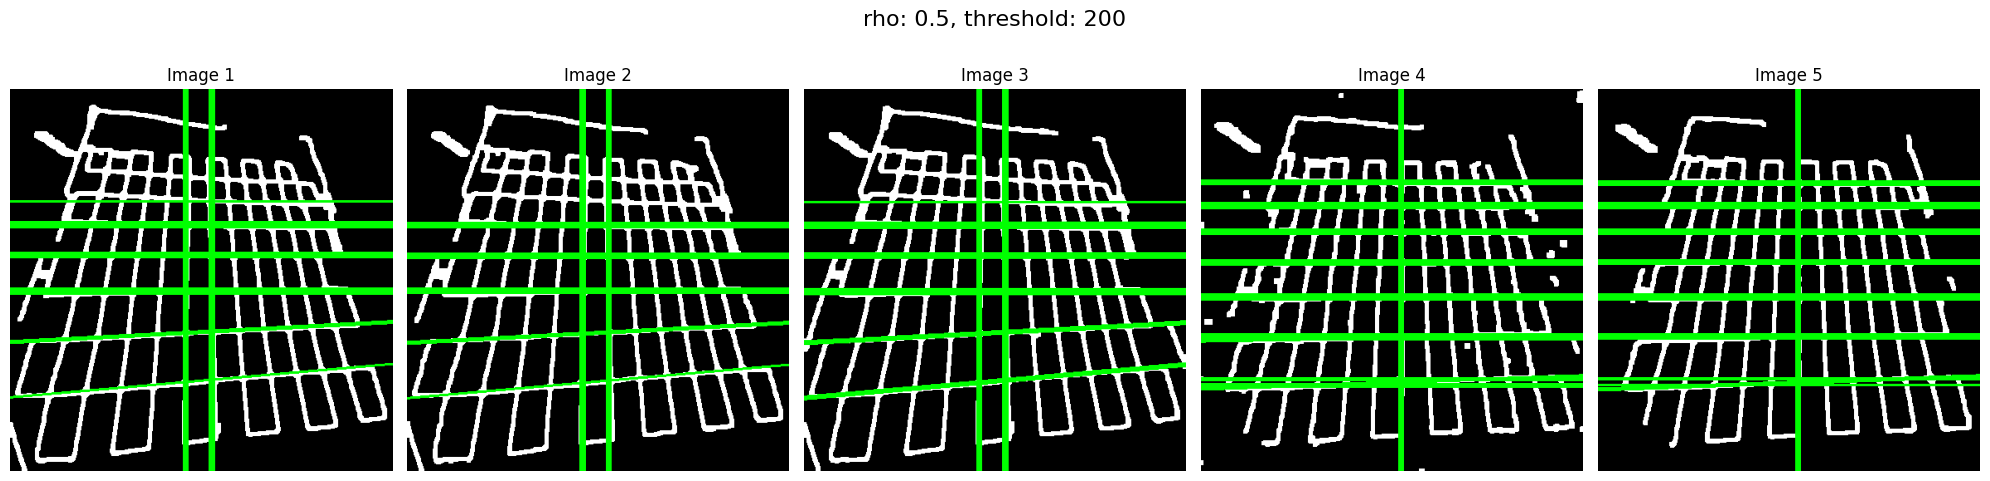

<Figure size 2000x1000 with 0 Axes>

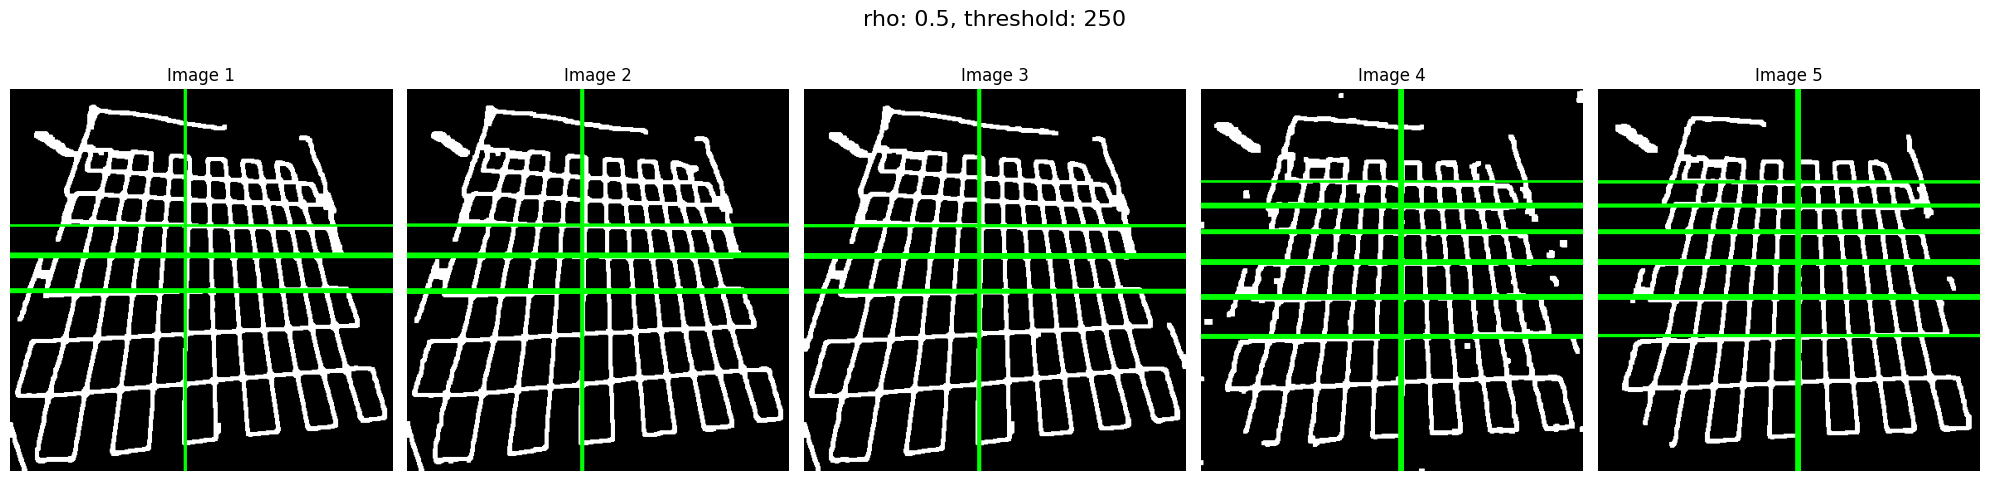

<Figure size 2000x1000 with 0 Axes>

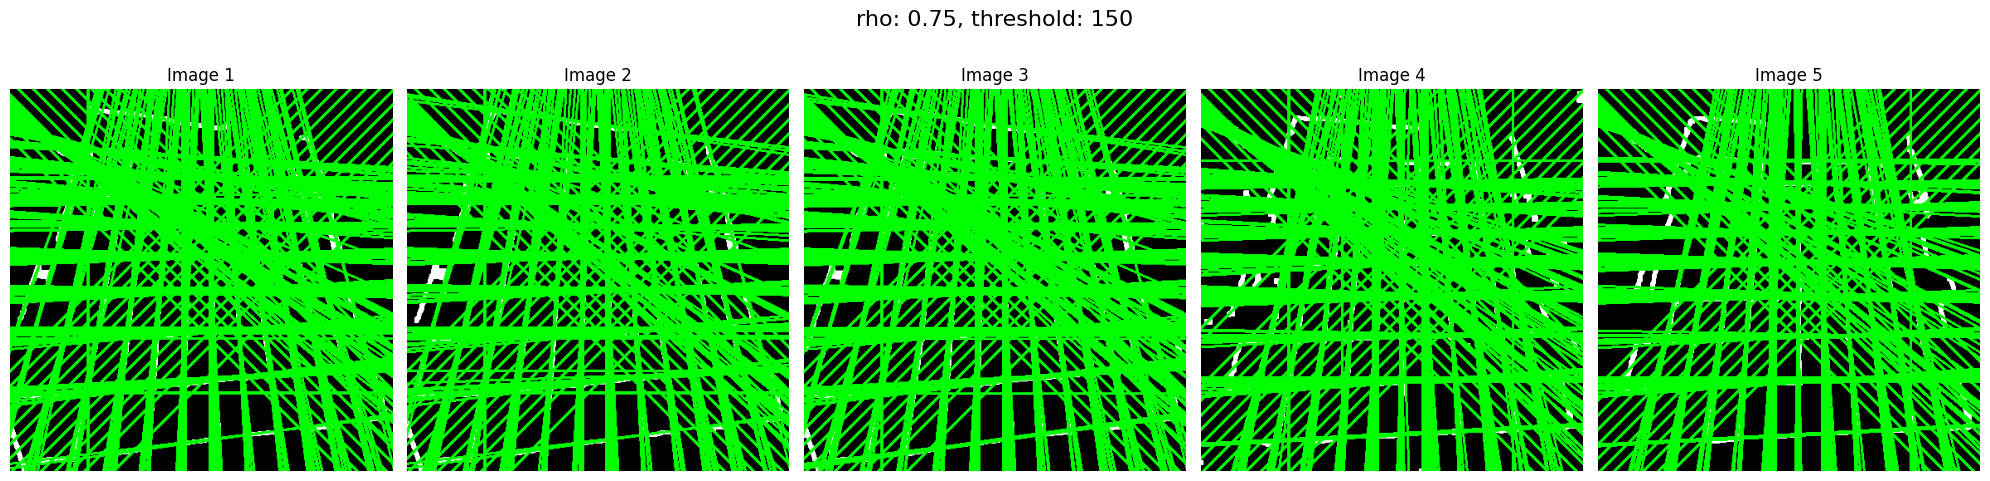

<Figure size 2000x1000 with 0 Axes>

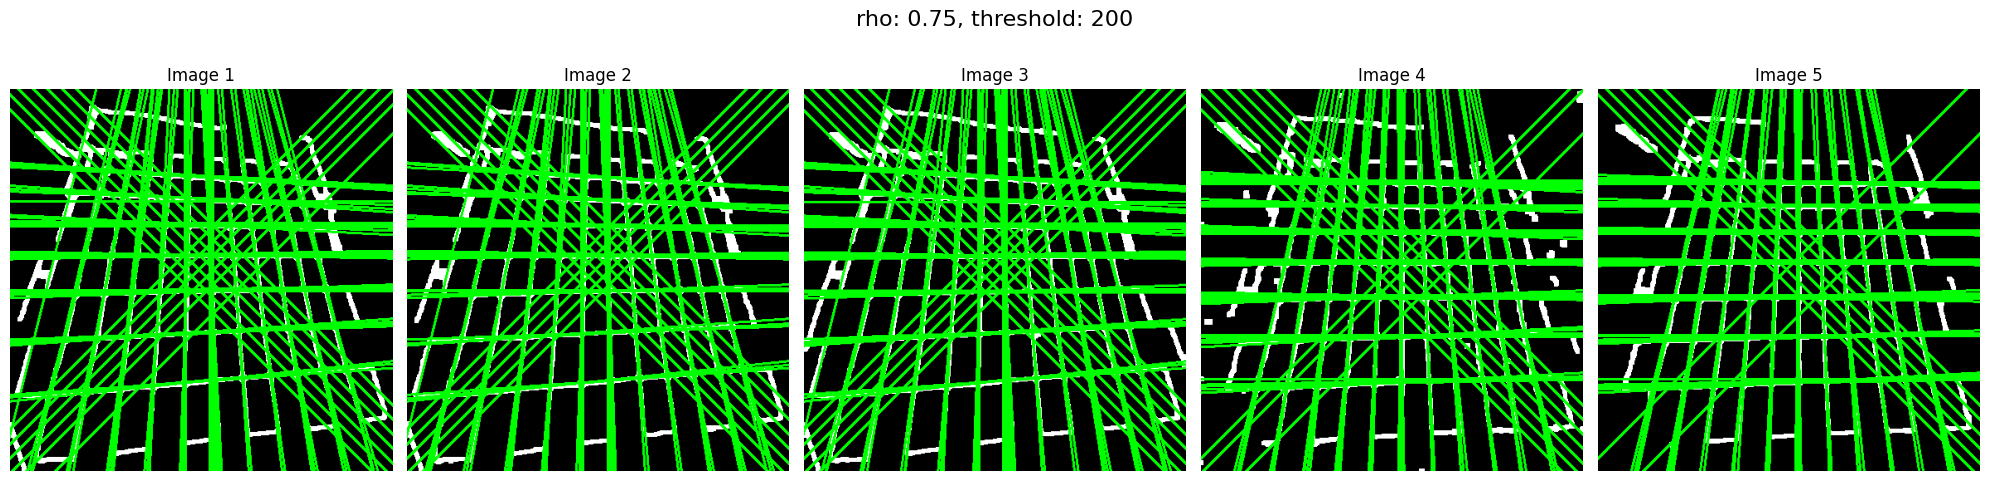

<Figure size 2000x1000 with 0 Axes>

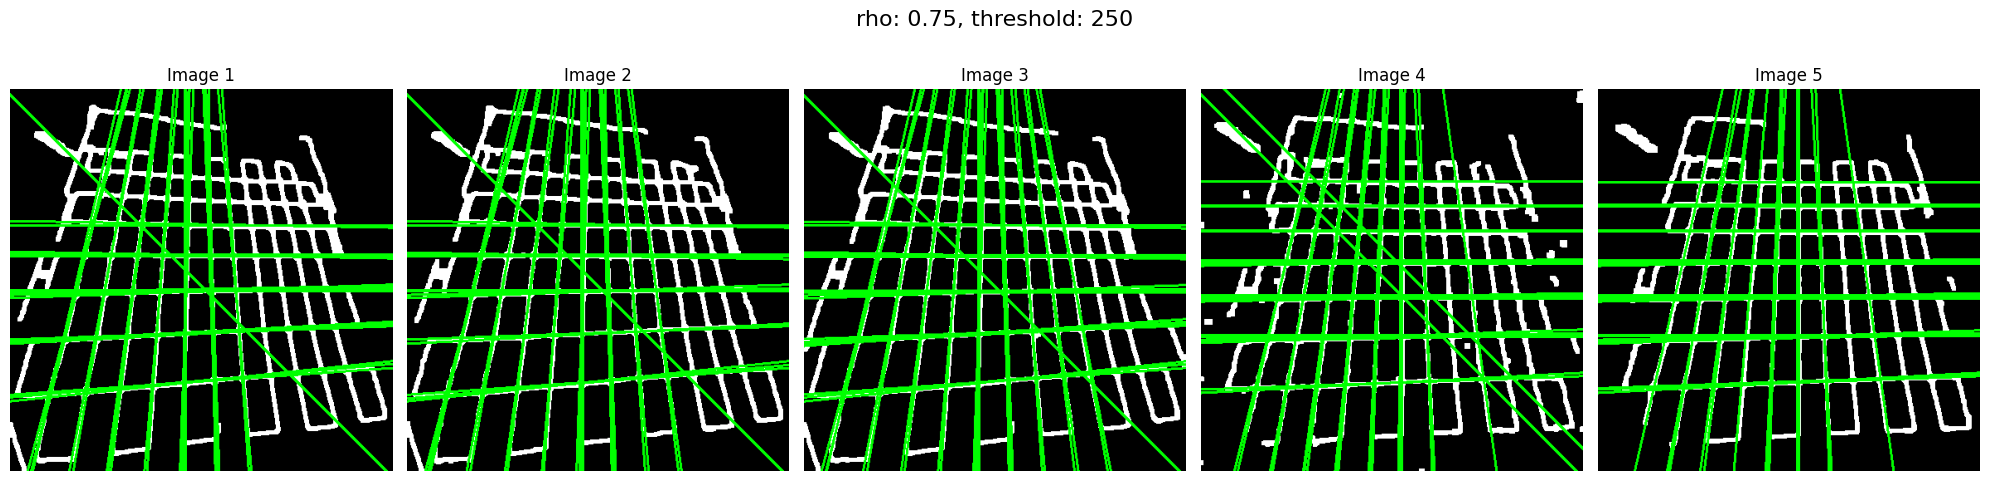

<Figure size 2000x1000 with 0 Axes>

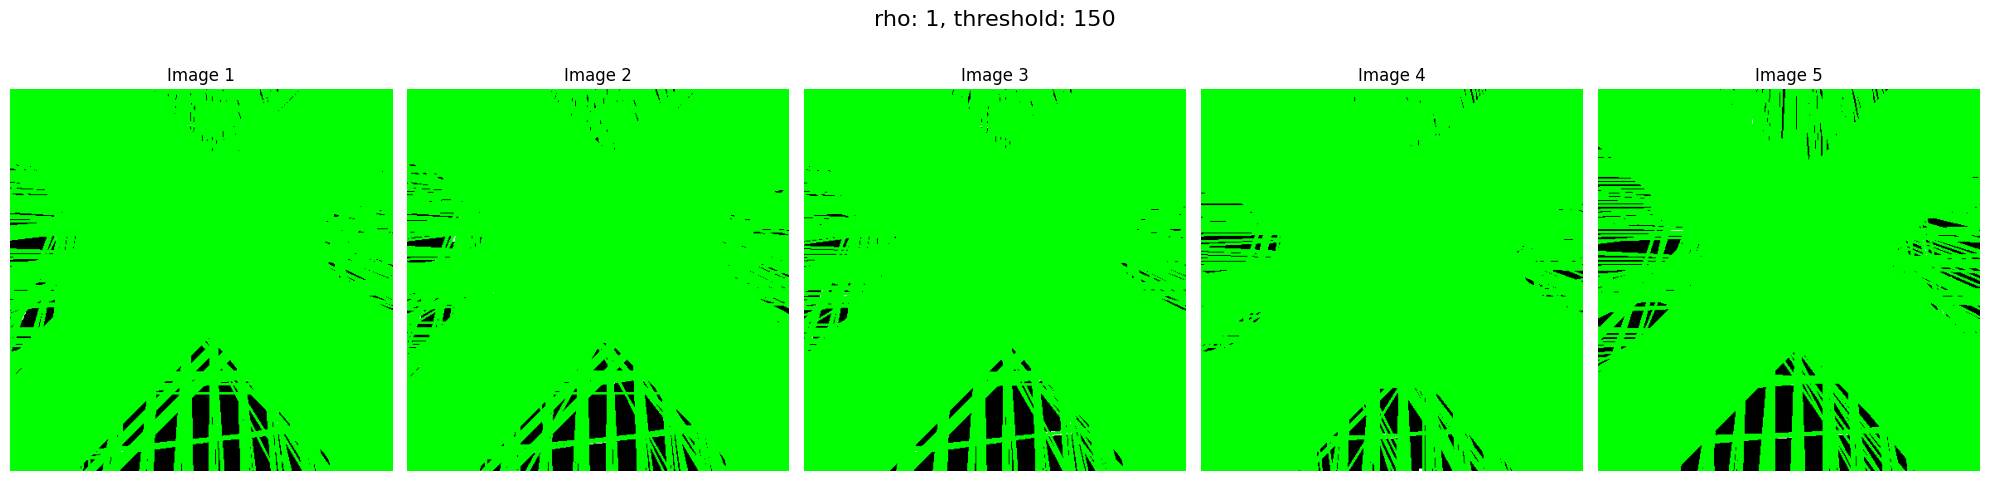

<Figure size 2000x1000 with 0 Axes>

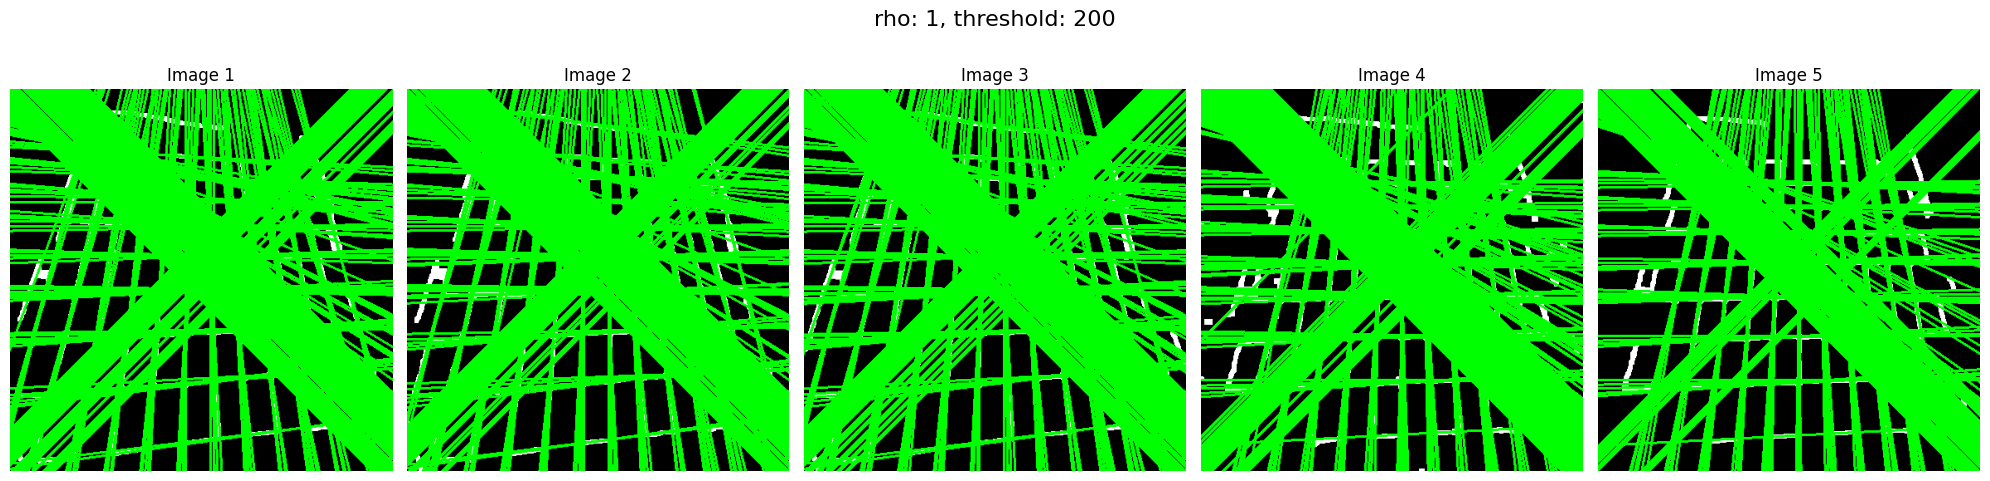

<Figure size 2000x1000 with 0 Axes>

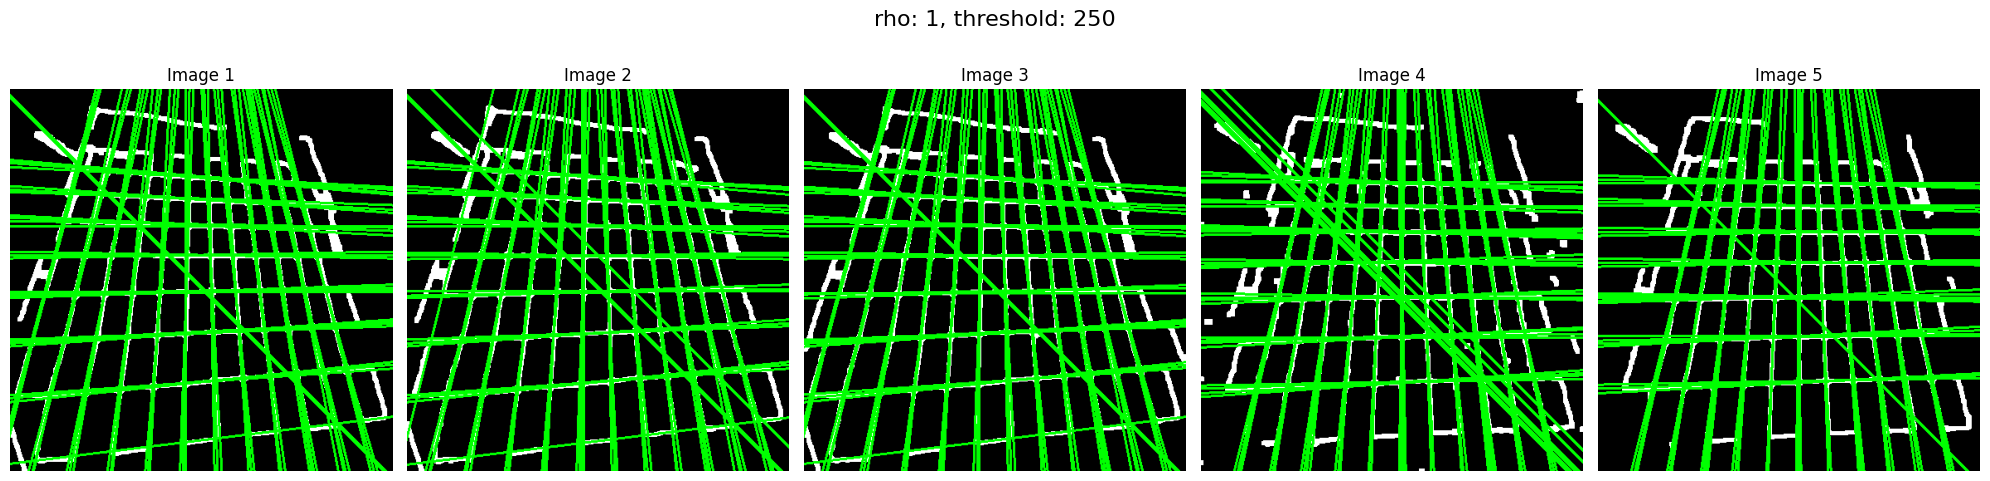

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

rho_values = [0.25,0.5, 0.75, 1]  # Các giá trị rho thử nghiệm
threshold_values = [150,200,250]  # Các giá trị threshold thử nghiệm

for rho in rho_values:
    for threshold in threshold_values:
        plt.figure(figsize=(20, 10))
        fig, axes = plt.subplots(1, len(dil_image), figsize=(20, 5))
        fig.suptitle(f'rho: {rho}, threshold: {threshold}', fontsize=16)

        for idx, edges in enumerate(dil_image):  # Sử dụng các ảnh đã xử lý (dilated)
            # Phát hiện đường thẳng với Hough Transform
            lines = cv2.HoughLines(edges, rho=rho, theta=np.pi/180, threshold=threshold)
            
            # Chuẩn bị ảnh để hiển thị kết quả
            output = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
            if lines is not None:
                for line in lines:
                    rho_val, theta = line[0]
                    a, b = np.cos(theta), np.sin(theta)
                    x0, y0 = a * rho_val, b * rho_val
                    x1 = int(x0 + 1000 * (-b))
                    y1 = int(y0 + 1000 * (a))
                    x2 = int(x0 - 1000 * (-b))
                    y2 = int(y0 - 1000 * (a))
                    cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Hiển thị từng ảnh
            axes[idx].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
            axes[idx].set_title(f'Image {idx + 1}')
            axes[idx].axis('off')

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()


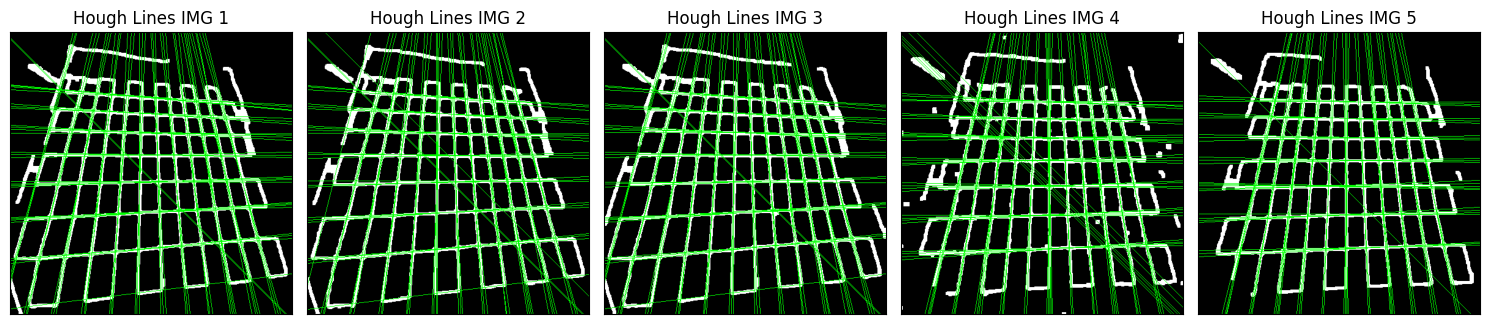

In [32]:
hf_imgs = []  
lines_data = []  # (rho, theta)

plt.figure(figsize=(15, 15))
for idx, edges in enumerate(dil_image):
    lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=250)

    # Vẽ các đường lên ảnh
    output = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a, b = np.cos(theta), np.sin(theta)
            x0, y0 = a * rho, b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 1)

    # Lưu ảnh kết quả và danh sách các đường
    hf_imgs.append(output)
    lines_data.append(lines[:, 0] if lines is not None else [])

    # Hiển thị kết quả
    plt.subplot(num_rows, num_columns, idx + 1)
    plt.imshow(output)
    plt.title(f"Hough Lines IMG {idx + 1}")
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


Image 1:
  vertical lines (filtered): 16
  horizontal lines (filtered): 7
Image 2:
  vertical lines (filtered): 16
  horizontal lines (filtered): 7
Image 3:
  vertical lines (filtered): 16
  horizontal lines (filtered): 7
Image 4:
  vertical lines (filtered): 14
  horizontal lines (filtered): 7
Image 5:
  vertical lines (filtered): 14
  horizontal lines (filtered): 7


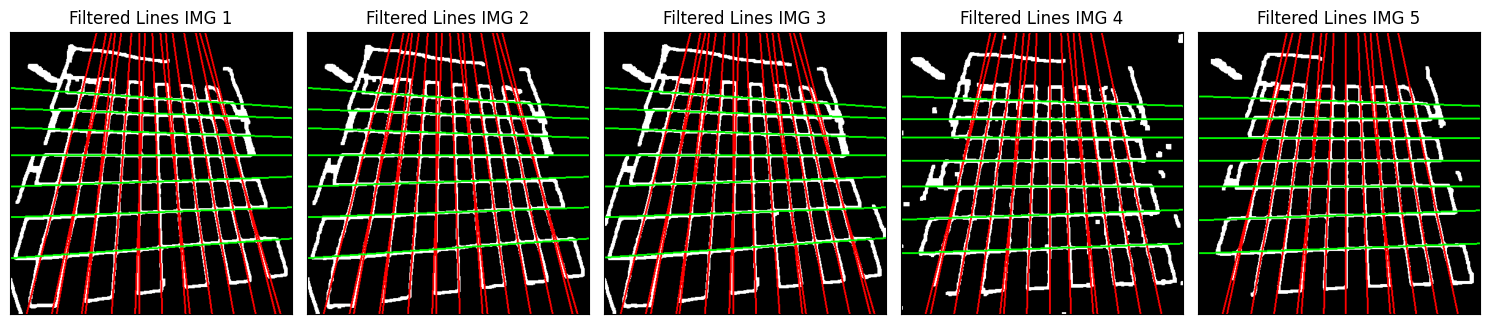

In [43]:
plt.figure(figsize=(15, 15))

# Define separate thresholds for vertical and horizontal lines
vertical_rho_threshold = 0.5
horizontal_rho_threshold = 20
# Define angle tolerance for horizontal lines (5 degrees)
horizontal_angle_tolerance = np.radians(5)  # Convert degrees to radians
angle_threshold = np.radians(0)

lines_data = []

for idx, edges in enumerate(dil_image):
    lines = cv2.HoughLines(edges, rho=1, theta=2*np.pi/180, threshold=250)
    vertical_lines = []
    horizontal_lines = []

    if lines is not None:
        vertical_rhos = []
        horizontal_rhos = []

        for rho, theta in lines[:, 0]:
            # Check for horizontal lines (angles close to pi/2, with tolerance for small deviations)
            if np.abs(theta - np.pi / 2) < np.pi / 9:  # horizontal lines (close to pi/2)
                # Check if the angle deviation from horizontal is within tolerance (5 degrees)
                if np.abs(theta - np.pi / 2) <= horizontal_angle_tolerance:
                    if all(abs(rho - hr) > horizontal_rho_threshold for hr in horizontal_rhos):
                        horizontal_rhos.append(rho)
                        horizontal_lines.append((rho, theta))
            else:# else: np.abs(theta) < np.pi / 4 or np.abs(theta - np.pi) < np.pi /2:  # verticla lines
                if all(abs(rho - vr) > vertical_rho_threshold and abs(theta - vt) > angle_threshold for vr,vt in vertical_lines):
                    vertical_rhos.append(rho)
                    vertical_lines.append((rho, theta))

    print(f"Image {idx + 1}:")
    print(f"  vertical lines (filtered): {len(vertical_lines)}")
    print(f"  horizontal lines (filtered): {len(horizontal_lines)}")

    original_image = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Draw vertical lines in blue
    for rho, theta in vertical_lines:
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(original_image, (x1, y1), (x2, y2), (255, 0, 0), 2)  

    # Draw horizontal lines in green
    for rho, theta in horizontal_lines:
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  

    # Display results
    plt.subplot(num_rows, num_columns, idx + 1)
    plt.imshow(original_image)
    plt.title(f"Filtered Lines IMG {idx + 1}")
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


In [26]:
# # Bước 3: Phân loại đường ngang và dọc
# plt.figure(figsize=(15, 15))

# for idx, edges in enumerate(edges_images):
#     lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100)
#     horizontal_lines = []
#     vertical_lines = []

#     if lines is not None:
#         for line in lines:
#             rho, theta = line[0]
#             if np.abs(theta - np.pi/2) < np.pi/4:  # Đường dọc
#                 vertical_lines.append(rho)
#             elif np.abs(theta) < np.pi/4 or np.abs(theta - np.pi) < np.pi/4:  # Đường ngang
#                 horizontal_lines.append(rho)

#     # Hiển thị kết quả phân loại
#     print(f"Ảnh {idx + 1}:")
#     print(f"  Đường ngang: {len(horizontal_lines)}")
#     print(f"  Đường dọc: {len(vertical_lines)}")

# # Bước 4: Loại bỏ các đường trùng lặp
# def remove_duplicates(lines, threshold=10):
#     lines = sorted(lines)
#     filtered_lines = [lines[0]]
#     for l in lines[1:]:
#         if l - filtered_lines[-1] > threshold:
#             filtered_lines.append(l)
#     return filtered_lines

# plt.figure(figsize=(15, 15))

# for idx, edges in enumerate(edges_images):
#     lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100)
#     horizontal_lines = []
#     vertical_lines = []

#     if lines is not None:
#         for line in lines:
#             rho, theta = line[0]
#             if np.abs(theta - np.pi/2) < np.pi/4:  # Đường dọc
#                 vertical_lines.append(rho)
#             elif np.abs(theta) < np.pi/4 or np.abs(theta - np.pi) < np.pi/4:  # Đường ngang
#                 horizontal_lines.append(rho)

#     # Loại bỏ các đường trùng lặp
#     horizontal_lines = remove_duplicates(horizontal_lines)
#     vertical_lines = remove_duplicates(vertical_lines)

#     print(f"Ảnh {idx + 1}:")
#     print(f"  Đường ngang (sau khi lọc): {len(horizontal_lines)}")
#     print(f"  Đường dọc (sau khi lọc): {len(vertical_lines)}")


# # Bước 5: Đếm số hàng và cột
# plt.figure(figsize=(15, 15))

# for idx, edges in enumerate(edges_images):
#     lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100)
#     horizontal_lines = []
#     vertical_lines = []

#     if lines is not None:
#         for line in lines:
#             rho, theta = line[0]
#             if np.abs(theta - np.pi/2) < np.pi/4:  # Đường dọc
#                 vertical_lines.append(rho)
#             elif np.abs(theta) < np.pi/4 or np.abs(theta - np.pi) < np.pi/4:  # Đường ngang
#                 horizontal_lines.append(rho)

#     # Loại bỏ các đường trùng lặp
#     horizontal_lines = remove_duplicates(horizontal_lines)
#     vertical_lines = remove_duplicates(vertical_lines)

#     # Đếm số hàng và cột
#     num_rows_count = len(horizontal_lines) - 1
#     num_columns_count = len(vertical_lines) - 1

#     print(f"Ảnh {idx + 1}: Số hàng = {num_rows_count}, Số cột = {num_columns_count}")

# #12,8